<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from _paths import nomeroff_net_dir

from nomeroff_net import pipeline
from nomeroff_net.tools import unzip


In [2]:
number_plate_detection_and_reading = pipeline("number_plate_detection_and_reading",
                                              path_to_model="modelhub://yolov5_brand_np",
                                              image_loader="opencv")

Downloaded model path: /mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/tools/../../data/./models/Detector/yolov5_brand_np/yolov5x_np_brand-2022-08-01.pt


yolov5x_np_brand-2022-08-01.pt: 173MB [02:06, 1.37MB/s]                              
YOLOv5 🚀 v6.1-168-g5743deb torch 1.9.0+cu102 CPU

Fusing layers... 
Model summary: 444 layers, 86193601 parameters, 0 gradients, 204.0 GFLOPs
Adding AutoShape... 


In [6]:
result = number_plate_detection_and_reading([
    os.path.join(nomeroff_net_dir, './data/examples/brand_np/empty_numberplate.jpeg'),
    os.path.join(nomeroff_net_dir, './data/examples/brand_np/filled_numberplate.jpeg'),
    os.path.join(nomeroff_net_dir, './data/examples/brand_np/brand_numberplate.jpeg'),
    os.path.join(nomeroff_net_dir, './data/examples/oneline_images/example1.jpeg'),
])

2022-08-02 11:41:15,558 [1686731] WARNING  py.warnings:109: [JupyterRequire] /mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/nnmodels/numberplate_options_model.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))

/mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/nnmodels/numberplate_options_model.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(self.fc3_reg(x1))

2022-08-02 11:41:15,569 [1686731] WARNING  py.warnings:109: [JupyterRequire] /mnt/data/var/www/nomeroff-net/examples/ju/inference/../../../nomeroff_net/nnmodels/numberplate_options_model.py:125: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(self.fc3_line

In [7]:
(images, images_bboxs, 
 images_points, images_zones, region_ids, 
 region_names, count_lines, 
 confidences, texts) = unzip(result)

[[     226.65      218.27      374.14      252.28     0.94507           1]
 [     39.454      210.51      95.048       224.8     0.79896           0]]


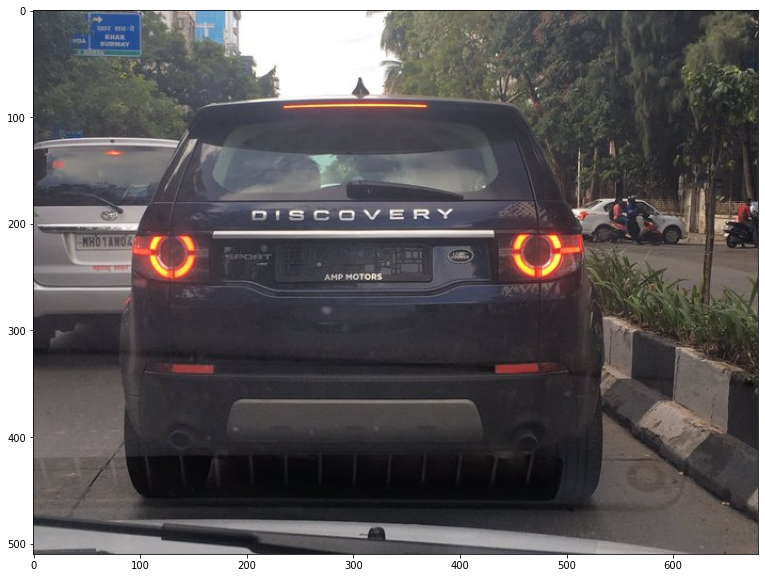

[[     1102.1      686.04      1297.8      758.85     0.89034           3]]


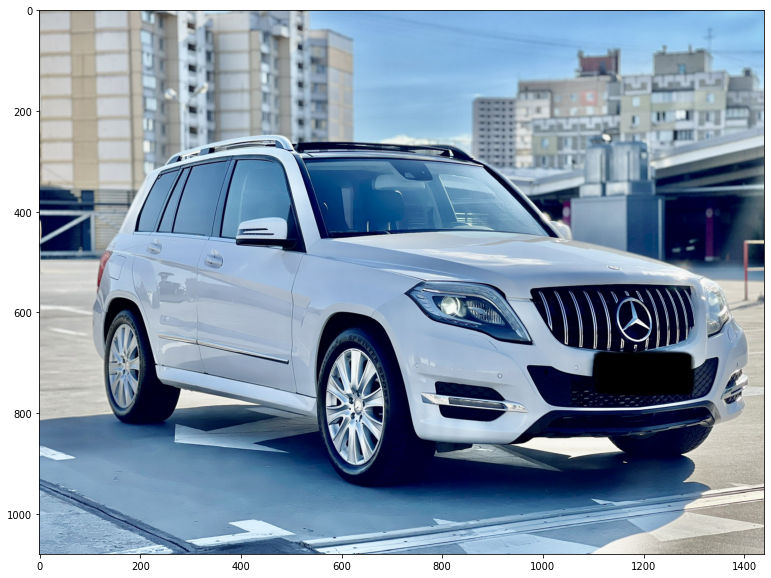

[[        479      688.58      757.83       753.3     0.94428           2]]


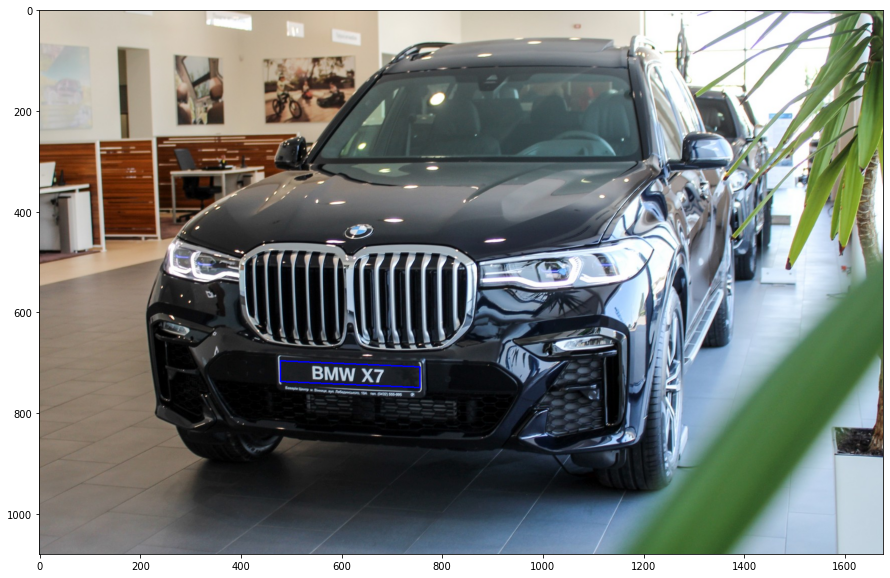

[[     866.63      459.24      1086.8      576.59     0.96438           0]]


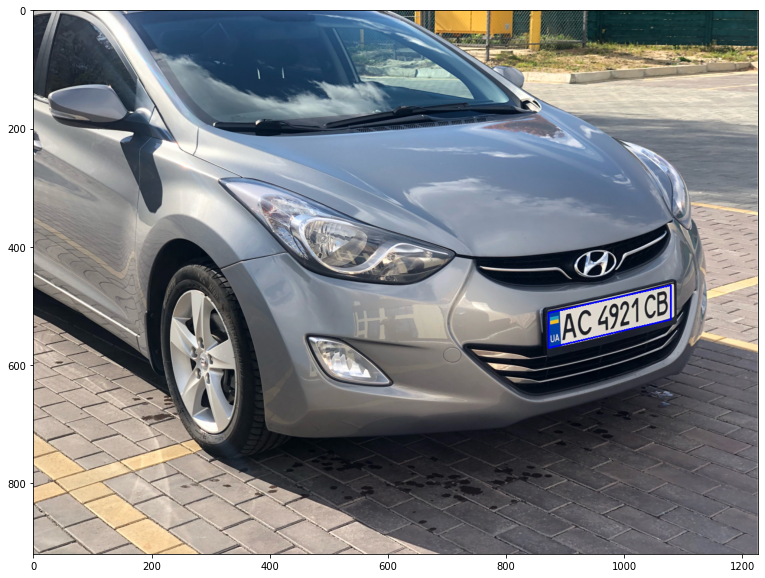

In [8]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

for img, image_points, image_bboxs in zip(images, images_points, images_bboxs):
    # 1 - brand_numberplate 0 -numberplate
    print(image_bboxs)
    img = img.astype(np.uint8)
    for cntr in image_points:
        cntr = np.array(cntr, dtype=np.int32)
        cv2.drawContours(img, [cntr], -1, (0, 0, 255), 2)
    plt.imshow(img)
    plt.show()